<a href="https://colab.research.google.com/github/havaledar/ECON3740_W25/blob/main/ECON3740_W25_lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries
First, let's import the matplotlib library along with numpy for some basic data manipulation:

In [13]:
%%capture

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


!pip install wooldridge
!pip install stargazer

import wooldridge as woo
from stargazer.stargazer import Stargazer

# matplotlib
Now, we'll create a simple line plot.

In [25]:
%%capture

!pip install wooldridge

import wooldridge as woo

data = woo.data('ceosal2')

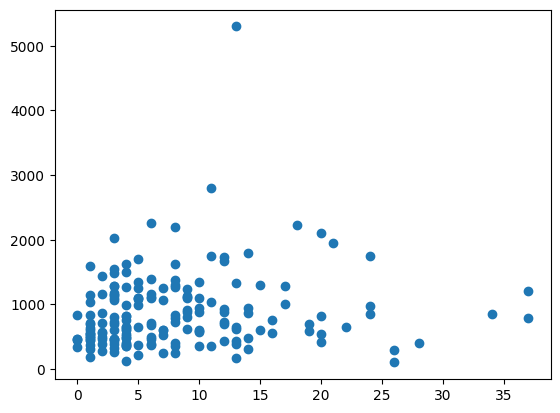

In [3]:
x = data['ceoten']
y = data['salary']

plt.scatter(x, y)
plt.show()

# seaborn

## Regression plot

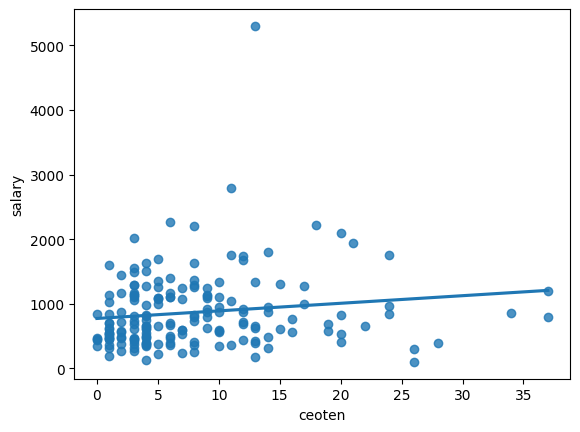

In [35]:
import seaborn as sns

sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            ci=False
            )

plt.show()

### Color#

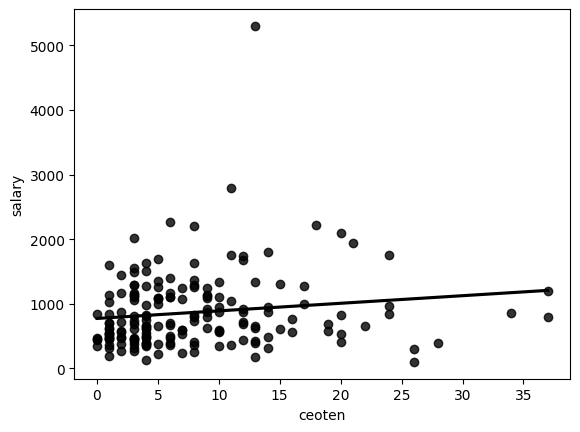

In [36]:
sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            ci=None,
            color= 'black'
            )

plt.show()

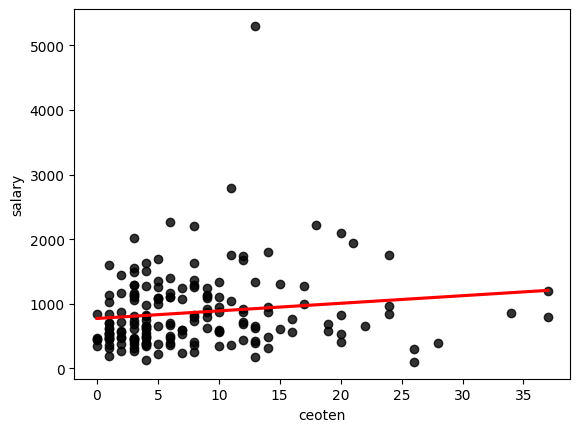

In [37]:
sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            ci=None,
            color= 'black',
            line_kws={'color': 'red'}
            )

plt.show()

## Confidence interval

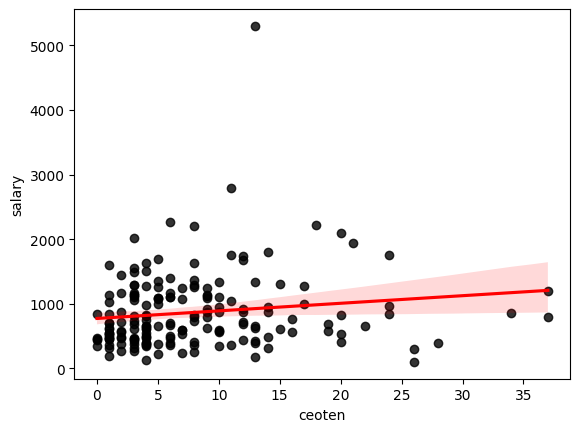

In [40]:
sns.regplot(x = 'ceoten',
            y = 'salary',
            data = data,
            # ci=None,
            color= 'black',
            line_kws={'color': 'red'}
            )

plt.show()

## Pair Grid

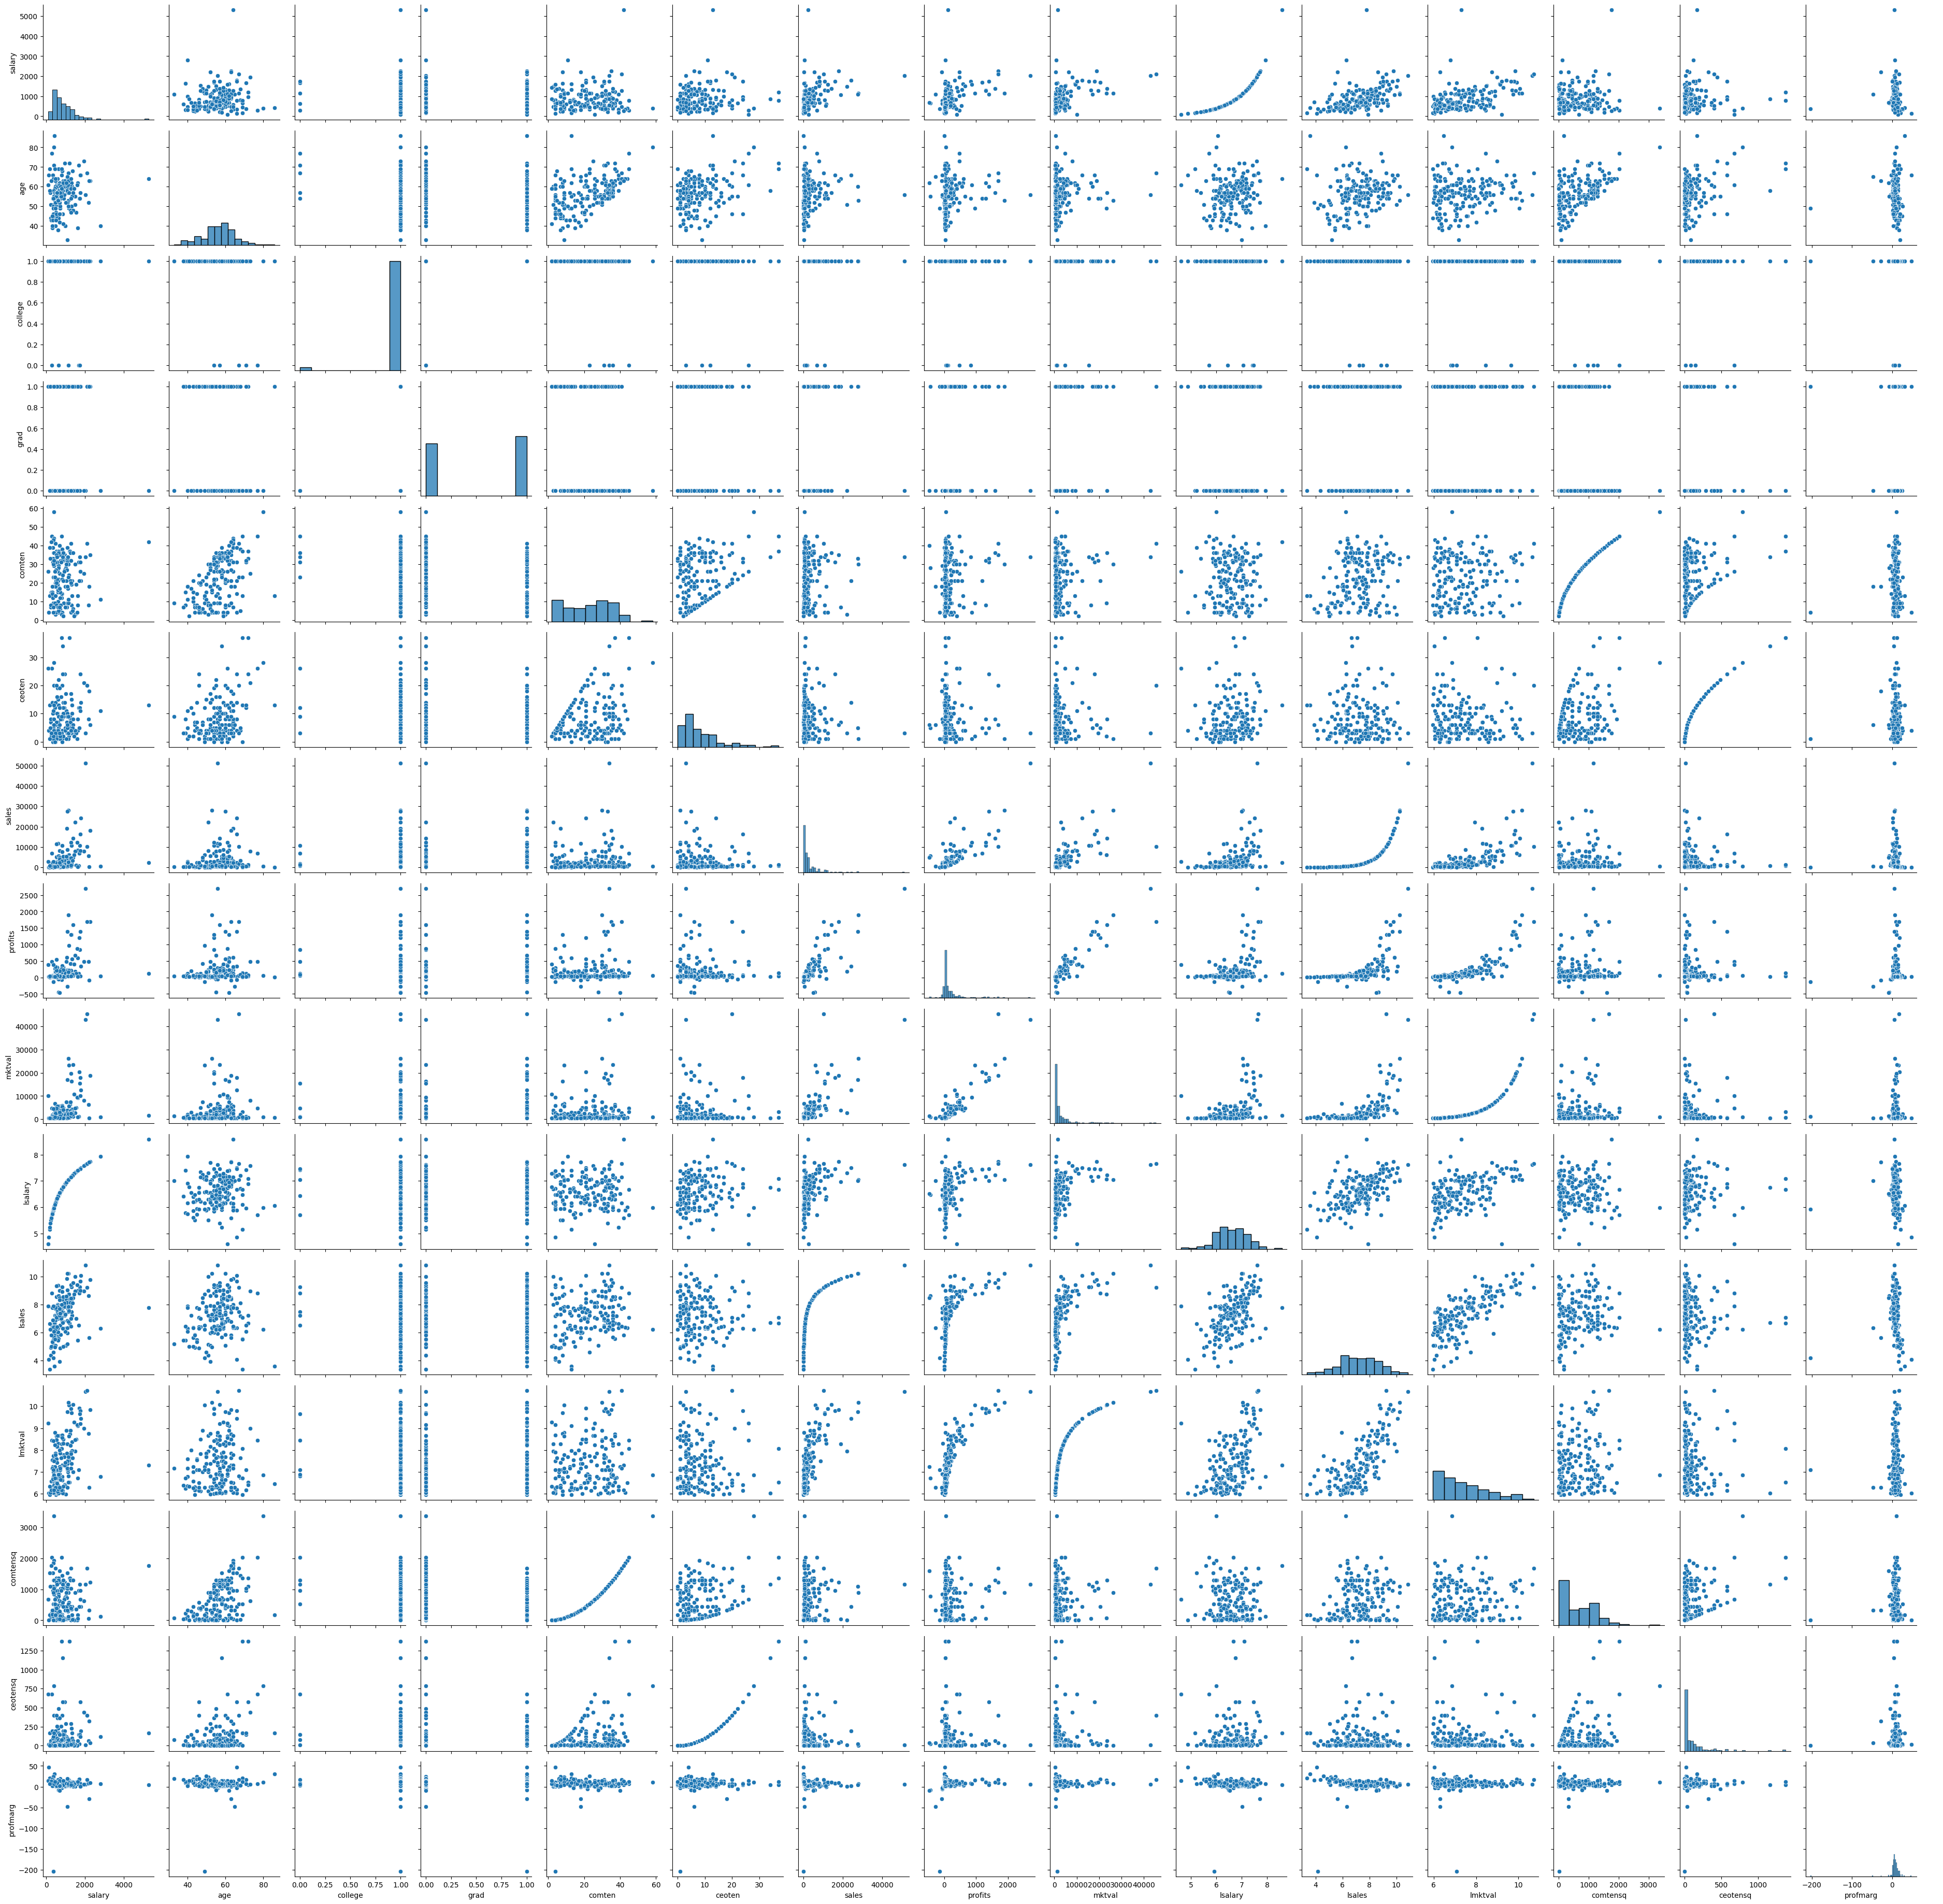

In [12]:
g = sns.PairGrid(data)

g.map_diag(sns.histplot)

g.map_offdiag(sns.scatterplot)

g.add_legend()

plt.show()

# stargazer

# Data

In [23]:
woo.data('kielmc', description=True)

name of dataset: kielmc
no of variables: 25
no of observations: 321

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| year     | 1978 or 1981                    |
| age      | age of house                    |
| agesq    | age^2                           |
| nbh      | neighborhood, 1-6               |
| cbd      | dist. to cent. bus. dstrct, ft. |
| intst    | dist. to interstate, ft.        |
| lintst   | log(intst)                      |
| price    | selling price                   |
| rooms    | # rooms in house                |
| area     | square footage of house         |
| land     | square footage lot              |
| baths    | # bathrooms                     |
| dist     | dist. from house to incin., ft. |
| ldist    | log(dist)                       |
| wind     | prc. time wind incin. to house  |
| lprice   | log(price)                      |
| y81      | =1 if year == 1981       

In [14]:
data = woo.data('kielmc')

# Rgression 1

In [15]:
model1 = smf.ols('np.log(price) ~ np.log(dist) + np.log(intst) + np.log(area) + np.log(land) + rooms + baths + age', data).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     65.02
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           2.49e-57
Time:                        13:13:59   Log-Likelihood:                -46.021
No. Observations:                 321   AIC:                             108.0
Df Residuals:                     313   BIC:                             138.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2997      0.596     10.569

In [16]:
stargazer = Stargazer([model1])

stargazer

# Regression 2

In [17]:
model2 = smf.ols('np.log(price) ~ np.log(dist) + np.log(intst) + I(np.log(intst)**2) + np.log(area) + np.log(land) + rooms + baths + age', data).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     63.04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.09e-60
Time:                        13:14:00   Log-Likelihood:                -35.746
No. Observations:                 321   AIC:                             89.49
Df Residuals:                     312   BIC:                             123.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.79

In [18]:
stargazer = Stargazer([model2])

stargazer

# Regression 3

In [19]:
model3 = smf.ols('np.log(price) ~ np.log(dist) + I(np.log(dist)**2) + np.log(intst) + I(np.log(intst)**2) + np.log(area) + np.log(land) + rooms + baths + age', data).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     56.21
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           4.89e-60
Time:                        13:14:02   Log-Likelihood:                -35.117
No. Observations:                 321   AIC:                             90.23
Df Residuals:                     311   BIC:                             127.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -11.10

In [20]:
stargazer = Stargazer([model3])

stargazer

# All

In [21]:
stargazer = Stargazer([model1, model2, model3])

stargazer

# Title

In [ ]:
stargazer.title("Regression Analysis Results")

stargazer

# Custom Model Names

In [ ]:
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3'], [1, 1, 1])
stargazer

# Remove Model Numbers

In [ ]:
stargazer.show_model_numbers(False)
stargazer

# Specify Significant Digits

In [ ]:
stargazer.significant_digits(2)
stargazer

# Show Confidence Intervals Over Standard Errors

In [ ]:
stargazer.show_confidence_intervals(True)
stargazer

# Subset Covariates and/or Choose Covariate Order

In [ ]:
stargazer.covariate_order(['rooms', 'baths', 'age'])
stargazer

# Rename Covariates

In [ ]:
stargazer.cov_names

In [ ]:
stargazer = Stargazer([model1, model2, model3])

stargazer

In [ ]:
stargazer.rename_covariates({
    'I(np.log(dist) ** 2)': 'Log(Distance) Squared',
    'I(np.log(intst) ** 2)': 'Log(Intensity) Squared',
    'np.log(area)': 'Log(Area)',
    'np.log(dist)': 'Log(Distance)',
    'np.log(intst)': 'Log(Intensity)',
    'np.log(land)': 'Log(Land)',
    'rooms': 'Rooms',
    'baths': 'Bathrooms',
    'age': 'Age'
})

stargazer.dependent_variable_name("Log(Price)")

stargazer

# Hide/Show Degrees of Freedom

In [ ]:
stargazer.show_degrees_of_freedom(False)
stargazer

# Show Custom Notes

In [ ]:
stargazer.add_custom_notes(['First note', 'Second note'])
stargazer

#Change Statistical Significance Cutoffs

In [ ]:
stargazer.significance_levels([0.1, 0.05, 0.07])
stargazer

In [ ]:
####

# Don't Show Statistical Significance Levels In Notes

In [ ]:
stargazer.append_notes(False)
stargazer

# Add spacing between rows

In [ ]:
stargazer.cov_spacing = 2
stargazer

# HTML

In [ ]:
stargazer.render_html()

In [ ]:
%%html
<table style="text-align:center"><tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable: Log(Price)</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr>

<tr><td style="text-align:left">Log(Distance) Squared</td><td></td><td></td><td>-0.103<sup></sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em"></td><td style="padding-bottom:2em"></td><td style="padding-bottom:2em">(0.093)</td></tr>
<tr><td style="text-align:left">Log(Intensity) Squared</td><td></td><td>-0.113<sup>***</sup></td><td>-0.089<sup>***</sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em"></td><td style="padding-bottom:2em">(0.025)</td><td style="padding-bottom:2em">(0.033)</td></tr>
<tr><td style="text-align:left">Intercept</td><td>6.300<sup>***</sup></td><td>-3.791<sup>*</sup></td><td>-11.105<sup></sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.596)</td><td style="padding-bottom:2em">(2.296)</td><td style="padding-bottom:2em">(7.006)</td></tr>
<tr><td style="text-align:left">Age</td><td>-0.004<sup>***</sup></td><td>-0.004<sup>***</sup></td><td>-0.004<sup>***</sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.001)</td><td style="padding-bottom:2em">(0.001)</td><td style="padding-bottom:2em">(0.001)</td></tr>
<tr><td style="text-align:left">Bathrooms</td><td>0.107<sup>***</sup></td><td>0.090<sup>***</sup></td><td>0.089<sup>***</sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.035)</td><td style="padding-bottom:2em">(0.034)</td><td style="padding-bottom:2em">(0.034)</td></tr>
<tr><td style="text-align:left">Log(Area)</td><td>0.512<sup>***</sup></td><td>0.514<sup>***</sup></td><td>0.506<sup>***</sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.070)</td><td style="padding-bottom:2em">(0.068)</td><td style="padding-bottom:2em">(0.068)</td></tr>
<tr><td style="text-align:left">Log(Distance)</td><td>0.028<sup></sup></td><td>0.190<sup>***</sup></td><td>2.110<sup></sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.053)</td><td style="padding-bottom:2em">(0.063)</td><td style="padding-bottom:2em">(1.739)</td></tr>
<tr><td style="text-align:left">Log(Intensity)</td><td>-0.044<sup></sup></td><td>1.902<sup>***</sup></td><td>1.520<sup>***</sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.042)</td><td style="padding-bottom:2em">(0.431)</td><td style="padding-bottom:2em">(0.552)</td></tr>
<tr><td style="text-align:left">Log(Land)</td><td>0.078<sup>***</sup></td><td>0.107<sup>***</sup></td><td>0.097<sup>***</sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.034)</td><td style="padding-bottom:2em">(0.033)</td><td style="padding-bottom:2em">(0.034)</td></tr>
<tr><td style="text-align:left">Rooms</td><td>0.050<sup>***</sup></td><td>0.049<sup>***</sup></td><td>0.048<sup>***</sup></td></tr>
<tr><td style="text-align:left;padding-bottom:2em"></td><td style="padding-bottom:2em">(0.024)</td><td style="padding-bottom:2em">(0.023)</td><td style="padding-bottom:2em">(0.023)</td></tr>

<tr><td style="text-align: left">More controls</td><td>No</td><td>No</td><td>Yes</td></tr><tr><td style="text-align: left">More controls</td><td>No</td><td>No</td><td>Yes</td></tr><tr><td style="text-align: left">More controls</td><td>No</td><td>No</td><td>Yes</td></tr><tr><td style="text-align: left">More controls</td><td>No</td><td>No</td><td>Yes</td></tr><tr><td style="text-align: left">More controls</td><td>No</td><td>No</td><td>Yes</td></tr><tr><td style="text-align: left">More controls</td><td>No</td><td>No</td><td>Yes</td></tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align: left">Observations</td><td>321</td><td>321</td><td>321</td></tr><tr><td style="text-align: left">R<sup>2</sup></td><td>0.593</td><td>0.618</td><td>0.619</td></tr><tr><td style="text-align: left">Adjusted R<sup>2</sup></td><td>0.583</td><td>0.608</td><td>0.608</td></tr><tr><td style="text-align: left">Residual Std. Error</td><td>0.283</td><td>0.274</td><td>0.274</td></tr><tr><td style="text-align: left">F Statistic</td><td>65.017<sup>***</sup></td><td>63.036<sup>***</sup></td><td>56.207<sup>***</sup></td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align: left">Note:</td></tr><td colspan="4" style="text-align: right">First note</td></tr><tr><td colspan="4" style="text-align: right">Second note</td></tr></table>

```html
<div style="text-align: center;">
  <h1 style="color: blue;">Welcome to Google Colab!</h1>
  <p>This is a sample HTML content displayed in a text cell.</p>
  <a href="https://colab.research.google.com/" target="_blank">Visit Google Colab</a>
</div>
```

# Latex

In [ ]:
print(stargazer.render_latex())

\begin{array}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\\[-1.8ex] & (1) & (2) & (3) \\
\hline \\[-1.8ex]
 I(np.log(dist) ** 2) & & & -0.103$^{}$ \\
& & & (0.093) \\
 I(np.log(intst) ** 2) & & -0.113$^{***}$ & -0.089$^{***}$ \\
& & (0.025) & (0.033) \\
 Intercept & 6.300$^{***}$ & -3.791$^{*}$ & -11.105$^{}$ \\
& (0.596) & (2.296) & (7.006) \\
 age & -0.004$^{***}$ & -0.004$^{***}$ & -0.004$^{***}$ \\
& (0.001) & (0.001) & (0.001) \\
 baths & 0.107$^{***}$ & 0.090$^{***}$ & 0.089$^{***}$ \\
& (0.035) & (0.034) & (0.034) \\
 np.log(area) & 0.512$^{***}$ & 0.514$^{***}$ & 0.506$^{***}$ \\
& (0.070) & (0.068) & (0.068) \\
 np.log(dist) & 0.028$^{}$ & 0.190$^{***}$ & 2.110$^{}$ \\
& (0.053) & (0.063) & (1.739) \\
 np.log(intst) & -0.044$^{}$ & 1.902$^{***}$ & 1.520$^{***}$ \\
& (0.042) & (0.431) & (0.552) \\
 np.log(land) & 0.078$^{**}$ & 0.107$^{***}$ & 0.097$^{***}$ \\
& (0.034) & (0.033) & (0.034) \\
 rooms & 0.050$^{**}$ & 0.049$^{**}$ & 0.048$^{**}$ \\
& (0.024) & (0.023) & (0.023) \\
\hline \\[-1.8ex]
 Observations & 321 & 321 & 321 \\
 $R^2$ & 0.593 & 0.618 & 0.619 \\
 Adjusted $R^2$ & 0.583 & 0.608 & 0.608 \\
 Residual Std. Error & 0.283 (df=313) & 0.274 (df=312) & 0.274 (df=311) \\
 F Statistic & 65.017$^{***}$ (df=7; 313) & 63.036$^{***}$ (df=8; 312) & 56.207$^{***}$ (df=9; 311) \\
\hline
\hline \\[-1.8ex]
\end{array}

\begin{array}{ccc}
foo&bar&baz\\
1&2&3
\end{array}